In [25]:
import pandas as pd
import numpy as np

In [26]:
df = pd.read_csv("final_clean_data.csv")

In [27]:
df = df.drop('for_sale', 1)
df = df.drop('description', 1)
df

,price(€),monthly(€),energy_performance_diagnosis_(kWhEP/m².year),Greenhouse_gas_emission(kgeqCO2/m².year),terrace,view,area(m²),room,bedroom,year_of_construction,...,ZAC Saint Sebastien,Zone Agricole,Zone Industrielle,Zone Industrielle du Prat,Zone Nord Est Urbaine,Zone Ouest Urbaine,Zone Pavillonnaire,Zone Pietonne,Zone Rurale Nord,Île de Nantes
0,349500,1449,150.0,35.0,1,0,105.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0
1,335000,1389,0.0,0.0,1,0,185.00,5,4,1976,...,0,0,0,0,0,0,0,0,0,0
2,2490000,10270,99.0,19.0,0,1,220.00,5,5,0,...,0,0,0,0,0,0,0,0,0,0
3,356000,1476,0.0,0.0,0,0,130.00,5,3,0,...,0,0,0,0,0,0,0,0,0,0
4,388500,1610,214.0,11.0,1,0,102.00,6,4,1986,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,148000,619,216.0,11.0,1,0,127.00,5,4,1988,...,0,0,0,0,0,0,0,0,0,0
1988,75240,317,305.0,0.0,0,0,140.00,5,2,1600,...,0,0,0,0,0,0,0,0,0,0
1989,375000,1554,167.0,7.0,1,0,72.45,3,2,0,...,0,0,0,0,0,0,0,0,0,0
1990,520000,2152,125.0,3.0,1,0,110.00,4,3,2007,...,0,0,0,0,0,0,0,0,0,0


In [28]:
y1_price = pd.DataFrame(np.log(df['price(€)']))
y2_monthly = pd.DataFrame(np.log(df['monthly(€)']))
df = df.drop('price(€)', 1)
df = df.drop('monthly(€)', 1)
x = pd.DataFrame(df)
y1_price

,price(€)
0,12.764259
1,12.721886
2,14.727793
3,12.782686
4,12.870048
...,...
1987,11.904968
1988,11.228438
1989,12.834681
1990,13.161584


<h1>Prediction of the prices</h1>

<h2>Linear Regression</h2>

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [86]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_test, Y_test_price)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

Model score= 0.9419815767150225
RMSE = 0.6315570304453816


<h2>Random Forest Regressor</h2>

In [87]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_price)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [88]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_test, Y_test_price)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

Model score= 0.8965912426715187
RMSE = 0.5250717380915336


<h2>Decision Tree Regressor</h2>

In [89]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_price)            
predictions=model.predict(X_test)

In [90]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_test, Y_test_price)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

Model score= 0.9999999995839493
RMSE = 0.7536798142687766


<h2>Regression using Keras</h2>

In [91]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_price, Y_test_price = train_test_split(x, y1_price.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Train on 1274 samples, validate on 319 samples
Epoch 1/50
1274/1274 [==============================] - 1s 835us/step - loss: 715.2236 - accuracy: 0.0000e+00 - val_loss: 109.8129 - val_accuracy: 0.0000e+00
Epoch 2/50
1274/1274 [==============================] - 0s 257us/step - loss: 416.3202 - accuracy: 0.0000e+00 - val_loss: 60.2237 - val_accuracy: 0.0000e+00
Epoch 3/50
1274/1274 [==============================] - 0s 250us/step - loss: 297.1890 - accuracy: 0.0000e+00 - val_loss: 45.8440 - val_accuracy: 0.0000e+00
Epoch 4/50
1274/1274 [==============================] - 0s 250us/step - loss: 1082.7949 - accuracy: 0.0000e+00 - val_loss: 30.7986 - val_accuracy: 0.0000e+00
Epoch 5/50
1274/1274 [==============================] - 0s 267us/step - loss: 88.7808 - accuracy: 0.0000e+00 - val_loss: 13.5077 - val_accuracy: 0.0000e+00
Epoch 6/50
1274/1274 [==============================] - 0s 245us/step - loss: 480.3410 - accuracy: 0.0000e+00 - val_loss: 15.5417 - val_accuracy: 0.0000e+00
Epoch 7/50

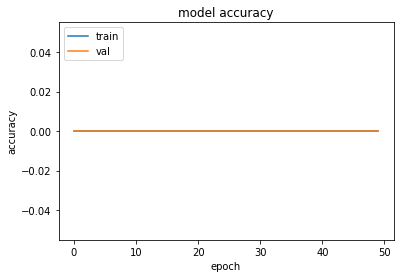

In [92]:
history = model.fit(X_train, Y_train_price,validation_split = 0.2, epochs=50)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

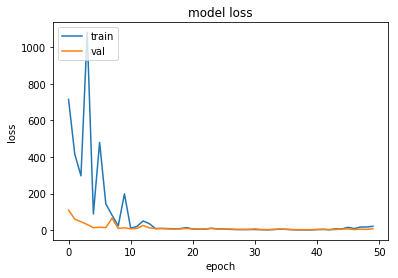

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [94]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE = " + str(sqrt(mean_squared_error(Y_test_price, predictions))))

RMSE = 0.9973624660675819


<h1>Prediction of the monthly prices</h1>

<h2>Linear Regression</h2>

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split    

model=LinearRegression()         

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [106]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_test, Y_test_monthly)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

Model score= 0.9544945662455779
RMSE = 0.5030724725051191


<h2>Random Forest Regressor</h2>

In [101]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model.fit(X_train, Y_train_monthly)           
predictions=model.predict(X_test)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [107]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_test, Y_test_monthly)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

Model score= 0.9544945662455779
RMSE = 0.5030724725051191


<h2>Decision Tree Regressor</h2>

In [110]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)     

model.fit(X_train, Y_train_monthly)            
predictions=model.predict(X_test)

In [111]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Model score= " + str(model.score(X_test, Y_test_monthly)))
print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

Model score= 1.0
RMSE = 0.6984422201184639


<h2>Regression using Keras</h2>

In [121]:
import matplotlib.pyplot as plt
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

X_train, X_test, Y_train_monthly, Y_test_monthly = train_test_split(x, y2_monthly.values.ravel(), test_size=0.2)    

model = Sequential()
n_cols = x.shape[1]
model.add(Dense(100,activation='relu',input_shape=(n_cols,)))
model.add(Dense(120,activation='relu'))
model.add(Dense(130,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(120,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])

Train on 1274 samples, validate on 319 samples
Epoch 1/50
1274/1274 [==============================] - 1s 567us/step - loss: 3447.2479 - accuracy: 0.0000e+00 - val_loss: 243.3219 - val_accuracy: 0.0000e+00
Epoch 2/50
1274/1274 [==============================] - 0s 316us/step - loss: 7092.0250 - accuracy: 0.0000e+00 - val_loss: 112.7526 - val_accuracy: 0.0000e+00
Epoch 3/50
1274/1274 [==============================] - 0s 262us/step - loss: 1952.3313 - accuracy: 0.0000e+00 - val_loss: 22.3198 - val_accuracy: 0.0000e+00
Epoch 4/50
1274/1274 [==============================] - 0s 265us/step - loss: 800.6002 - accuracy: 0.0000e+00 - val_loss: 29.9819 - val_accuracy: 0.0000e+00
Epoch 5/50
1274/1274 [==============================] - 0s 267us/step - loss: 21.5746 - accuracy: 0.0000e+00 - val_loss: 3.2747 - val_accuracy: 0.0000e+00
Epoch 6/50
1274/1274 [==============================] - 0s 273us/step - loss: 116.4711 - accuracy: 0.0000e+00 - val_loss: 6.0388 - val_accuracy: 0.0000e+00
Epoch 7/5

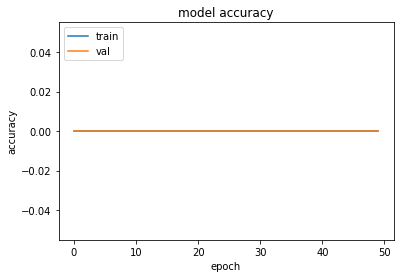

In [122]:
history = model.fit(X_train, Y_train_monthly,validation_split = 0.2, epochs=50)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

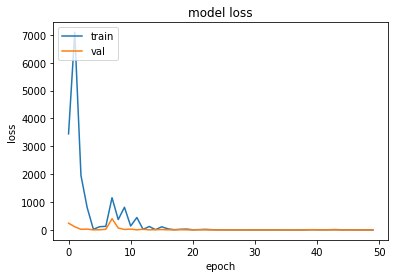

In [123]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [124]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE = " + str(sqrt(mean_squared_error(Y_test_monthly, predictions))))

RMSE = 1.0632480108580507
